Loading datasets to analyze...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.jsonl:   0%|          | 0.00/1.75G [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/195M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/236 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

validation.jsonl:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/2.40M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]


SENTIMENT DISTRIBUTION (Amazon Polarity)
       Label  Percentage
Negative (0)      48.988
Positive (1)      51.012

EMOTION DISTRIBUTION (GoEmotions - All 28 Classes)
       Emotion  Count  Percentage
       neutral  14219   27.824198
    admiration   4130    8.081717
      approval   2939    5.751130
     gratitude   2662    5.209088
     annoyance   2470    4.833376
     amusement   2328    4.555506
     curiosity   2191    4.287420
          love   2086    4.081952
   disapproval   2022    3.956715
      optimism   1581    3.093752
         anger   1567    3.066356
           joy   1452    2.841320
     confusion   1368    2.676947
       sadness   1326    2.594760
disappointment   1269    2.483220
   realization   1110    2.172084
        caring   1087    2.127077
      surprise   1060    2.074242
    excitement    853    1.669178
       disgust    793    1.551768
        desire    641    1.254329
          fear    596    1.166272
       remorse    545    1.066474
 embarrassment 

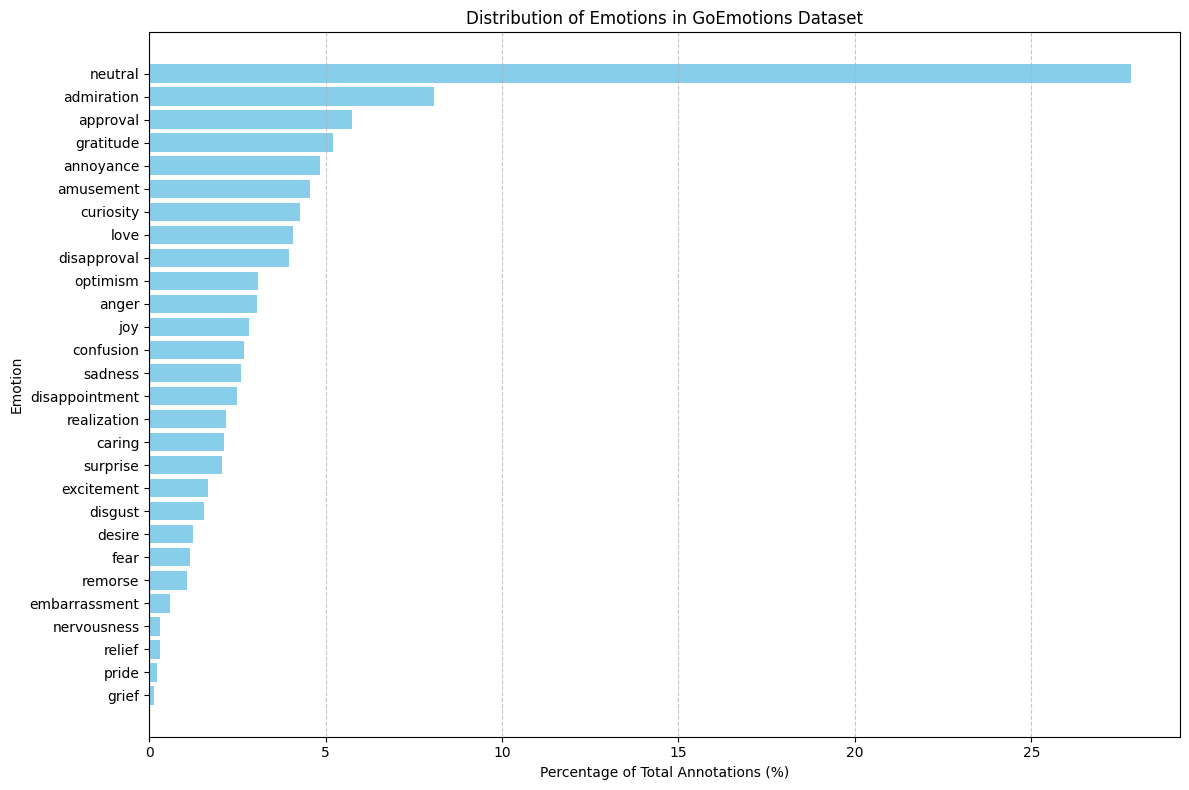

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# --- 1. SETUP ---
# Define Emotion Labels
EMOTION_COLUMNS = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]

# Load Datasets
print("Loading datasets to analyze...")
dataset_s = load_dataset("SetFit/amazon_polarity", split="train[:50000]")
dataset_e = load_dataset("SetFit/go_emotions", split="train")

# --- 2. ANALYZE SENTIMENT (Amazon) ---
print("\n" + "="*40)
print("SENTIMENT DISTRIBUTION (Amazon Polarity)")
print("="*40)

s_labels = dataset_s['label']
s_counts = pd.Series(s_labels).value_counts(normalize=True) * 100

df_sentiment = pd.DataFrame({
    'Label': ['Negative (0)', 'Positive (1)'],
    'Percentage': [s_counts.get(0, 0.0), s_counts.get(1, 0.0)]
})
print(df_sentiment.to_string(index=False))

# --- 3. ANALYZE EMOTIONS (FULL LIST) ---
print("\n" + "="*40)
print("EMOTION DISTRIBUTION (GoEmotions - All 28 Classes)")
print("="*40)

# 1. Convert to Pandas
df_e = dataset_e.to_pandas()

# 2. Sum the columns directly
emotion_counts = df_e[EMOTION_COLUMNS].sum()
total_annotations = emotion_counts.sum()

# 3. Create the Summary DataFrame
emo_data = []
for emotion, count in emotion_counts.items():
    percent = (count / total_annotations) * 100
    emo_data.append({'Emotion': emotion, 'Count': count, 'Percentage': percent})

# Sort by Percentage (Highest to Lowest)
df_emotions = pd.DataFrame(emo_data).sort_values(by='Percentage', ascending=False)

# --- MODIFIED: Print the Entire Table ---
# 'to_string' forces pandas to print every row without truncating
print(df_emotions.to_string(index=False))

# --- 4. VISUALIZATION (Optional but Recommended) ---
print("\nGenerating Plot...")
plt.figure(figsize=(12, 8))
plt.barh(df_emotions['Emotion'], df_emotions['Percentage'], color='skyblue')
plt.xlabel('Percentage of Total Annotations (%)')
plt.ylabel('Emotion')
plt.title('Distribution of Emotions in GoEmotions Dataset')
plt.gca().invert_yaxis()  # Put the highest percentage at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

--- 1. Loading Datasets (SetFit Versions) ---


Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


--- 2. Calculating Class Weights ---
 Sample Weights (First 5): tensor([ 9.5109, 17.6469, 26.7026, 16.5749, 13.7703])
 Neutral Weight (Last): 2.0530
 Final Emotion Dataset Size: 43410


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.



Starting Weighted Focal Training on cuda...


Epoch 1: Val Loss: 0.1580 | Sent F1: 0.9264 | Emo F1: 0.1304 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 2: Val Loss: 0.1468 | Sent F1: 0.9205 | Emo F1: 0.1800 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 3: Val Loss: 0.1307 | Sent F1: 0.9299 | Emo F1: 0.2121 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 4: Val Loss: 0.1271 | Sent F1: 0.9310 | Emo F1: 0.2336 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 5: Val Loss: 0.1244 | Sent F1: 0.9359 | Emo F1: 0.2475 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 6: Val Loss: 0.1287 | Sent F1: 0.9299 | Emo F1: 0.2608 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 7: Val Loss: 0.1384 | Sent F1: 0.9345 | Emo F1: 0.2685 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 8: Val Loss: 0.1416 | Sent F1: 0.9269 | Emo F1: 0.2783 | LR: 0.000020
  --> Best Score! Model Saved.


Epoch 9: Val Loss: 0.1413 | Sent F1: 0.9264 | Emo F1: 0.2833 | LR: 0.000010
  --> Best Score! Model Saved.


Epoch 10: Val Loss: 0.1454 | Sent F1: 0.9343 | Emo F1: 0.2803 | LR: 0.000010
  --> Best Score! Model Saved.


Epoch 11: Val Loss: 0.1433 | Sent F1: 0.9348 | Emo F1: 0.2924 | LR: 0.000010
  --> Best Score! Model Saved.


Epoch 12: Val Loss: 0.1488 | Sent F1: 0.9317 | Emo F1: 0.2932 | LR: 0.000010


Epoch 13: Val Loss: 0.1570 | Sent F1: 0.9352 | Emo F1: 0.2995 | LR: 0.000005
  --> Best Score! Model Saved.


Epoch 14: Val Loss: 0.1551 | Sent F1: 0.9320 | Emo F1: 0.3084 | LR: 0.000005
  --> Best Score! Model Saved.


Epoch 15: Val Loss: 0.1548 | Sent F1: 0.9354 | Emo F1: 0.3054 | LR: 0.000005
  --> Best Score! Model Saved.


Epoch 16: Val Loss: 0.1527 | Sent F1: 0.9314 | Emo F1: 0.3120 | LR: 0.000005
  --> Best Score! Model Saved.


Epoch 17: Val Loss: 0.1589 | Sent F1: 0.9287 | Emo F1: 0.3089 | LR: 0.000003


Epoch 18: Val Loss: 0.1583 | Sent F1: 0.9326 | Emo F1: 0.3129 | LR: 0.000003
  --> Best Score! Model Saved.


Epoch 19: Val Loss: 0.1550 | Sent F1: 0.9381 | Emo F1: 0.3144 | LR: 0.000003
  --> Best Score! Model Saved.


Epoch 20: Val Loss: 0.1574 | Sent F1: 0.9374 | Emo F1: 0.3180 | LR: 0.000003
  --> Best Score! Model Saved.


Epoch 21: Val Loss: 0.1636 | Sent F1: 0.9335 | Emo F1: 0.3191 | LR: 0.000001


Epoch 22: Val Loss: 0.1618 | Sent F1: 0.9337 | Emo F1: 0.3194 | LR: 0.000001


Epoch 23: Val Loss: 0.1620 | Sent F1: 0.9362 | Emo F1: 0.3192 | LR: 0.000001


Epoch 24: Val Loss: 0.1635 | Sent F1: 0.9376 | Emo F1: 0.3181 | LR: 0.000001
  --> Best Score! Model Saved.


Epoch 25: Val Loss: 0.1621 | Sent F1: 0.9349 | Emo F1: 0.3209 | LR: 0.000001
  --> Best Score! Model Saved.


Epoch 26: Val Loss: 0.1615 | Sent F1: 0.9351 | Emo F1: 0.3189 | LR: 0.000001


Epoch 27: Val Loss: 0.1650 | Sent F1: 0.9342 | Emo F1: 0.3188 | LR: 0.000001


Epoch 28: Val Loss: 0.1631 | Sent F1: 0.9366 | Emo F1: 0.3212 | LR: 0.000001
  --> Best Score! Model Saved.


Epoch 29: Val Loss: 0.1659 | Sent F1: 0.9365 | Emo F1: 0.3207 | LR: 0.000001


Epoch 30: Val Loss: 0.1662 | Sent F1: 0.9346 | Emo F1: 0.3235 | LR: 0.000001
  --> Best Score! Model Saved.


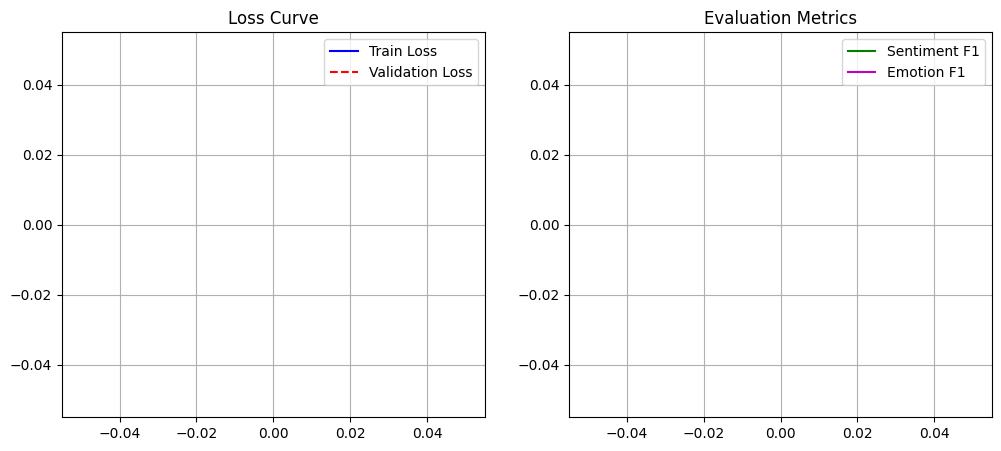

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import f1_score, accuracy_score

# --- CONFIGURATION ---
MODEL_NAME = 'sentence-transformers/all-MiniLM-L6-v2'
MAX_LEN = 128
BATCH_SIZE = 32
EPOCHS = 30
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

EMOTION_COLUMNS = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]
NUM_EMOTIONS = len(EMOTION_COLUMNS)

# 1. CLASSES (Model, Loss, Dataset, Metrics)


class MetricsTracker:
    def __init__(self):
        self.reset()

    def reset(self):
        self.sent_preds = []
        self.sent_targets = []
        self.emo_preds = []
        self.emo_targets = []

    def update_sent(self, logits, labels):
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        self.sent_preds.extend(preds)
        self.sent_targets.extend(labels.cpu().numpy())

    def update_emo(self, logits, labels):
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).int().cpu().numpy()
        self.emo_preds.extend(preds)
        self.emo_targets.extend(labels.cpu().numpy())

    def calculate(self):
        sent_acc = accuracy_score(self.sent_targets, self.sent_preds)
        sent_f1 = f1_score(self.sent_targets, self.sent_preds, average='binary')
        emo_f1_micro = f1_score(self.emo_targets, self.emo_preds, average='micro')
        return {
            'sent_acc': sent_acc,
            'sent_f1': sent_f1,
            'emo_f1_micro': emo_f1_micro
        }

class SupConLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(SupConLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features, labels):
        device = features.device
        batch_size = features.shape[0]
        anchor_dot_contrast = torch.div(torch.matmul(features, features.T), self.temperature)
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()
        mask_self = torch.eye(batch_size, dtype=torch.float32).to(device)
        labels = labels.contiguous().view(-1, 1)
        mask_pos = torch.eq(labels, labels.T).float().to(device) - mask_self
        exp_logits = torch.exp(logits) * (1 - mask_self)
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))
        mean_log_prob_pos = (mask_pos * log_prob).sum(1) / (mask_pos.sum(1) + 1e-8)
        return -mean_log_prob_pos.mean()
class FocalLossMultiLabel(nn.Module):
    # ADD pos_weight to the init
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean', pos_weight=None):
        super(FocalLossMultiLabel, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        # PASS the pos_weight to the internal BCE loss
        self.bce = nn.BCEWithLogitsLoss(reduction='none', pos_weight=pos_weight)

    def forward(self, logits, targets):
        bce_loss = self.bce(logits, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class MTLSBERT(nn.Module):
    def __init__(self, model_name, num_emotions=28):
        super(MTLSBERT, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.hidden_size = self.bert.config.hidden_size
        self.sentiment_head = nn.Linear(self.hidden_size, 2)
        self.emotion_head = nn.Linear(self.hidden_size, num_emotions)
        self.contrastive_head = nn.Sequential(
            nn.Linear(self.hidden_size, self.hidden_size), nn.ReLU(),
            nn.Linear(self.hidden_size, 128)
        )

    def mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def forward(self, input_ids, attention_mask, task_type):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        embeddings = self.mean_pooling(outputs, attention_mask)
        if task_type == 'sentiment':
            return self.sentiment_head(embeddings), F.normalize(self.contrastive_head(embeddings), dim=1)
        elif task_type == 'emotion':
            return self.emotion_head(embeddings), None

class MTLDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len, task_type):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.task_type = task_type

    def __len__(self): return len(self.data)

    def __getitem__(self, index):
        row = self.data.iloc[index]
        text = str(row['text'])
        inputs = self.tokenizer(text, add_special_tokens=True, max_length=self.max_len, padding='max_length', truncation=True, return_tensors='pt')
        item = {'input_ids': inputs['input_ids'].squeeze(), 'attention_mask': inputs['attention_mask'].squeeze(), 'task_type': self.task_type}

        if self.task_type == 'sentiment':
            item['labels'] = torch.tensor(row['label'], dtype=torch.long)
        elif self.task_type == 'emotion':
            label_vector = [float(row[col]) for col in EMOTION_COLUMNS]
            item['labels'] = torch.tensor(label_vector, dtype=torch.float)
        return item

# ==========================================
# 2. DATA PREPARATION
# ==========================================

def prepare_data():
    print("--- 1. Loading Datasets (SetFit Versions) ---")

    # 1. Load full Emotion dataset
    ds_emo = load_dataset("SetFit/go_emotions", split="train")
    emo_train_size = len(ds_emo) # 43,410

    # 2. Load Sentiment, SHUFFLE, then match the Emotion size perfectly
    ds_sent_full = load_dataset("SetFit/amazon_polarity", split="train")
    ds_sent = ds_sent_full.shuffle(seed=42).select(range(emo_train_size))

    # 3. Clean validation sets (2000 is plenty for sentiment validation)
    val_s_ds = load_dataset("SetFit/amazon_polarity", split="test").shuffle(seed=42).select(range(2000))
    val_e_ds = load_dataset("SetFit/go_emotions", split="test")

    df_sent = ds_sent.to_pandas()
    df_emo = ds_emo.to_pandas()
    df_val_s = val_s_ds.to_pandas()
    df_val_e = val_e_ds.to_pandas()

    if 'text' in df_sent.columns: pass
    elif 'content' in df_sent.columns:
        df_sent = df_sent.rename(columns={'content': 'text'})
        df_val_s = df_val_s.rename(columns={'content': 'text'})

    print("--- 2. Calculating Class Weights ---")
    pos_counts = df_emo[EMOTION_COLUMNS].sum().values
    total_samples = len(df_emo)
    neg_counts = total_samples - pos_counts

    pos_weights = torch.tensor(neg_counts / (pos_counts + 1e-6), dtype=torch.float)

    print(" Sample Weights (First 5):", pos_weights[:5])
    print(f" Neutral Weight (Last): {pos_weights[-1]:.4f}")

    df_emo_final = df_emo.sample(frac=1, random_state=42).reset_index(drop=True)
    print(f" Final Emotion Dataset Size: {len(df_emo_final)}")

    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

    train_loader_s = DataLoader(MTLDataset(df_sent, tokenizer, MAX_LEN, 'sentiment'), batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    train_loader_e = DataLoader(MTLDataset(df_emo_final, tokenizer, MAX_LEN, 'emotion'), batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

    val_loader_s = DataLoader(MTLDataset(df_val_s, tokenizer, MAX_LEN, 'sentiment'), batch_size=BATCH_SIZE, shuffle=False)
    val_loader_e = DataLoader(MTLDataset(df_val_e, tokenizer, MAX_LEN, 'emotion'), batch_size=BATCH_SIZE, shuffle=False)

    return train_loader_s, train_loader_e, val_loader_s, val_loader_e, pos_weights


def training(tr_s, tr_e, val_s, val_e, emotion_pos_weights):
    model = MTLSBERT(MODEL_NAME).to(DEVICE)
    optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-3)

    # Scheduler remains watching the Loss
    scheduler = ReduceLROnPlateau(
        optimizer,
        mode='min',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    )

    criterion_s = nn.CrossEntropyLoss()

    # We now pass the emotion_pos_weights here
    criterion_e = FocalLossMultiLabel(
        alpha=0.25,
        gamma=2.0,
        pos_weight=emotion_pos_weights.to(DEVICE)
    ).to(DEVICE)

    criterion_con = SupConLoss()

    tracker = MetricsTracker()
    history = {'train_loss': [], 'val_loss': [], 'sent_f1': [], 'emo_f1': []}
    best_score = 0.0

    print(f"\nStarting Weighted Focal Training on {DEVICE}...")

    for epoch in range(EPOCHS):
        model.train()
        run_loss, steps = 0, 0
        loop = tqdm(zip(tr_s, tr_e), total=min(len(tr_s), len(tr_e)), leave=False)

        for batch_s, batch_e in loop:
            optimizer.zero_grad()

            #Sentiment Task
            s_in, s_mask, s_lbl = batch_s['input_ids'].to(DEVICE), batch_s['attention_mask'].to(DEVICE), batch_s['labels'].to(DEVICE)
            s_logits, s_proj = model(s_in, s_mask, 'sentiment')
            loss_s = criterion_s(s_logits, s_lbl) + 0.5 * criterion_con(s_proj, s_lbl)

            # Emotion Task
            e_in, e_mask, e_lbl = batch_e['input_ids'].to(DEVICE), batch_e['attention_mask'].to(DEVICE), batch_e['labels'].to(DEVICE)
            e_logits, _ = model(e_in, e_mask, 'emotion')
            loss_e = criterion_e(e_logits, e_lbl)

            # Backprop
            loss = loss_s + loss_e
            loss.backward()
            optimizer.step()

            run_loss += loss.item()
            steps += 1
            loop.set_postfix(loss=run_loss/steps)

        # --- VALIDATE ---
        model.eval()
        val_loss = 0
        tracker.reset()
        with torch.no_grad():
            for batch in val_s:
                in_ids, mask, lbl = batch['input_ids'].to(DEVICE), batch['attention_mask'].to(DEVICE), batch['labels'].to(DEVICE)
                logits, _ = model(in_ids, mask, 'sentiment')
                val_loss += criterion_s(logits, lbl).item()
                tracker.update_sent(logits, lbl)

            for batch in val_e:
                in_ids, mask, lbl = batch['input_ids'].to(DEVICE), batch['attention_mask'].to(DEVICE), batch['labels'].to(DEVICE)
                logits, _ = model(in_ids, mask, 'emotion')
                val_loss += criterion_e(logits, lbl).item()
                tracker.update_emo(logits, lbl)

        avg_val_loss = val_loss / (len(val_s) + len(val_e))
        metrics = tracker.calculate()

        # Step scheduler based on Loss
        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']

        print(f"Epoch {epoch+1}: Val Loss: {avg_val_loss:.4f} | Sent F1: {metrics['sent_f1']:.4f} | Emo F1: {metrics['emo_f1_micro']:.4f} | LR: {current_lr:.6f}")

        # Checkpointing
        current_score = (metrics['sent_f1'] + metrics['emo_f1_micro']) / 2
        if current_score > best_score:
            best_score = current_score
            torch.save(model.state_dict(), "best_mtl_model.pth")
            print(f"  --> Best Score! Model Saved.")
    plot_results(history['train_loss'], history['val_loss'], history)

def plot_results(train_losses, val_losses, metrics_history):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Train Loss')
    plt.plot(epochs, val_losses, 'r--', label='Validation Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics_history['sent_f1'], 'g-', label='Sentiment F1')
    plt.plot(epochs, metrics_history['emo_f1'], 'm-', label='Emotion F1')
    plt.title('Evaluation Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # 1. Prepare Data with Weights
    tr_s, tr_e, val_s, val_e, weights = prepare_data()
    # 2. Run Training passing weights
    training(tr_s, tr_e, val_s, val_e, weights)

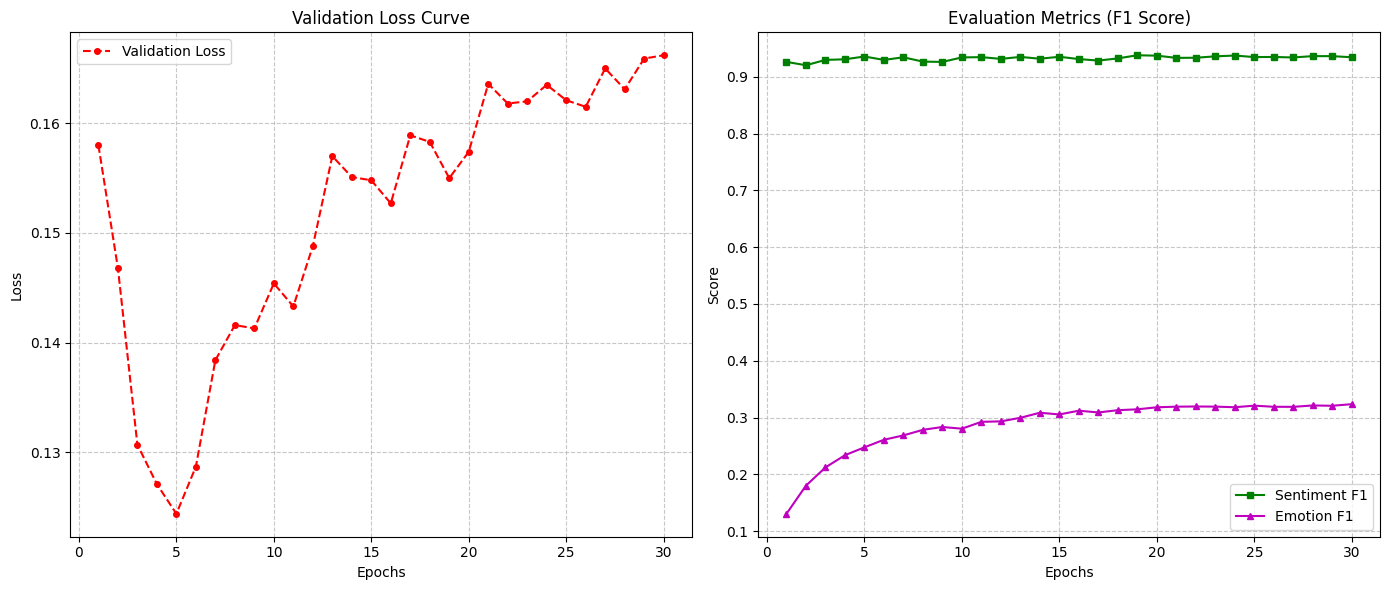

In [ ]:
import matplotlib.pyplot as plt

# 1. Your extracted training data
epochs = list(range(1, 31))

val_losses = [
    0.1580, 0.1468, 0.1307, 0.1271, 0.1244, 0.1287, 0.1384, 0.1416, 0.1413, 0.1454,
    0.1433, 0.1488, 0.1570, 0.1551, 0.1548, 0.1527, 0.1589, 0.1583, 0.1550, 0.1574,
    0.1636, 0.1618, 0.1620, 0.1635, 0.1621, 0.1615, 0.1650, 0.1631, 0.1659, 0.1662
]

sent_f1 = [
    0.9264, 0.9205, 0.9299, 0.9310, 0.9359, 0.9299, 0.9345, 0.9269, 0.9264, 0.9343,
    0.9348, 0.9317, 0.9352, 0.9320, 0.9354, 0.9314, 0.9287, 0.9326, 0.9381, 0.9374,
    0.9335, 0.9337, 0.9362, 0.9376, 0.9349, 0.9351, 0.9342, 0.9366, 0.9365, 0.9346
]

emo_f1 = [
    0.1304, 0.1800, 0.2121, 0.2336, 0.2475, 0.2608, 0.2685, 0.2783, 0.2833, 0.2803,
    0.2924, 0.2932, 0.2995, 0.3084, 0.3054, 0.3120, 0.3089, 0.3129, 0.3144, 0.3180,
    0.3191, 0.3194, 0.3192, 0.3181, 0.3209, 0.3189, 0.3188, 0.3212, 0.3207, 0.3235
]

# 2. Plotting the data
plt.figure(figsize=(14, 6))

# Validation Loss Subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, val_losses, 'r--', marker='o', markersize=4, label='Validation Loss')
plt.title('Validation Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Metrics Subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, sent_f1, 'g-', marker='s', markersize=4, label='Sentiment F1')
plt.plot(epochs, emo_f1, 'm-', marker='^', markersize=4, label='Emotion F1')
plt.title('Evaluation Metrics (F1 Score)')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer

# (Make sure your MTLSBERT class, MTLDataset class, and CONFIGURATIONS are defined above this)

def tune_emotion_thresholds(model_path="best_mtl_model.pth"):
    print("Loading model and validation data...")

    # 1. Load the model
    model = MTLSBERT(MODEL_NAME).to(DEVICE)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    # 2. Load the validation data (GoEmotions)
    val_e_ds = load_dataset("SetFit/go_emotions", split="test")
    df_val_e = val_e_ds.to_pandas()

    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    val_loader = DataLoader(
        MTLDataset(df_val_e, tokenizer, MAX_LEN, 'emotion'),
        batch_size=BATCH_SIZE,
        shuffle=False
    )

    # 3. Get all predictions and true labels
    all_probs = []
    all_targets = []

    with torch.no_grad():
        for batch in val_loader:
            in_ids = batch['input_ids'].to(DEVICE)
            mask = batch['attention_mask'].to(DEVICE)
            lbls = batch['labels'].cpu().numpy()

            # Get raw logits and apply sigmoid for probabilities
            logits, _ = model(in_ids, mask, 'emotion')
            probs = torch.sigmoid(logits).cpu().numpy()

            all_probs.extend(probs)
            all_targets.extend(lbls)

    all_probs = np.array(all_probs)
    all_targets = np.array(all_targets)

    # 4. Tune threshold for EACH of the 28 emotions independently
    print("\n--- Tuning Thresholds ---")
    optimal_thresholds = []

    # Test 100 possible thresholds between 0.01 and 0.99
    threshold_grid = np.linspace(0.01, 0.99, 100)

    for i, emotion in enumerate(EMOTION_COLUMNS):
        best_t = 0.5
        best_f1 = 0.0

        for t in threshold_grid:
            # Convert probabilities to binary predictions based on current threshold t
            preds = (all_probs[:, i] >= t).astype(int)
            score = f1_score(all_targets[:, i], preds, zero_division=0)

            if score > best_f1:
                best_f1 = score
                best_t = t

        optimal_thresholds.append(best_t)
        print(f"{emotion.capitalize():<15} | Best Threshold: {best_t:.2f} | Max F1: {best_f1:.4f}")

    # 5. Calculate the new overall Micro F1 with custom thresholds
    final_preds = np.zeros_like(all_probs)
    for i in range(NUM_EMOTIONS):
        final_preds[:, i] = (all_probs[:, i] >= optimal_thresholds[i]).astype(int)

    old_preds = (all_probs >= 0.5).astype(int)

    old_micro_f1 = f1_score(all_targets, old_preds, average='micro')
    new_micro_f1 = f1_score(all_targets, final_preds, average='micro')

    print("\n=== FINAL RESULTS ===")
    print(f"Old Micro F1 (0.50 Threshold):  {old_micro_f1:.4f}")
    print(f"New Micro F1 (Tuned Threshold): {new_micro_f1:.4f}")

    return optimal_thresholds

if __name__ == "__main__":
    best_thresholds = tune_emotion_thresholds()

Loading model and validation data...


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Repo card metadata block was not found. Setting CardData to empty.



--- Tuning Thresholds ---
Admiration      | Best Threshold: 0.86 | Max F1: 0.6762
Amusement       | Best Threshold: 0.93 | Max F1: 0.8363
Anger           | Best Threshold: 0.91 | Max F1: 0.4834
Annoyance       | Best Threshold: 0.75 | Max F1: 0.3642
Approval        | Best Threshold: 0.76 | Max F1: 0.4051
Caring          | Best Threshold: 0.92 | Max F1: 0.4252
Confusion       | Best Threshold: 0.92 | Max F1: 0.4220
Curiosity       | Best Threshold: 0.78 | Max F1: 0.5621
Desire          | Best Threshold: 0.90 | Max F1: 0.5278
Disappointment  | Best Threshold: 0.89 | Max F1: 0.2914
Disapproval     | Best Threshold: 0.80 | Max F1: 0.3888
Disgust         | Best Threshold: 0.93 | Max F1: 0.5233
Embarrassment   | Best Threshold: 0.99 | Max F1: 0.4746
Excitement      | Best Threshold: 0.96 | Max F1: 0.4262
Fear            | Best Threshold: 0.95 | Max F1: 0.6667
Gratitude       | Best Threshold: 0.95 | Max F1: 0.9118
Grief           | Best Threshold: 0.99 | Max F1: 0.5556
Joy             | Bes

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel

# --- CONFIGURATION ---
MODEL_NAME = 'sentence-transformers/all-MiniLM-L6-v2'
MAX_LEN = 128
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

EMOTION_COLUMNS = [
    "admiration", "amusement", "anger", "annoyance", "approval", "caring",
    "confusion", "curiosity", "desire", "disappointment", "disapproval",
    "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief",
    "joy", "love", "nervousness", "optimism", "pride", "realization",
    "relief", "remorse", "sadness", "surprise", "neutral"
]

# The precise mathematical thresholds discovered during tuning
TUNED_THRESHOLDS = [
    0.86, 0.93, 0.91, 0.75, 0.76, 0.92, 0.92, 0.78, 0.90, 0.89, 0.80,
    0.93, 0.99, 0.96, 0.95, 0.95, 0.99, 0.94, 0.88, 0.98, 0.93, 0.99,
    0.84, 0.94, 0.98, 0.95, 0.94, 0.53
]

# --- MODEL ARCHITECTURE (Required for loading state_dict) ---
class MTLSBERT(nn.Module):
    def __init__(self, model_name, num_emotions=28):
        super(MTLSBERT, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.hidden_size = self.bert.config.hidden_size
        self.sentiment_head = nn.Linear(self.hidden_size, 2)
        self.emotion_head = nn.Linear(self.hidden_size, num_emotions)
        self.contrastive_head = nn.Sequential(
            nn.Linear(self.hidden_size, self.hidden_size), nn.ReLU(),
            nn.Linear(self.hidden_size, 128)
        )

    def mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def forward(self, input_ids, attention_mask, task_type):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        embeddings = self.mean_pooling(outputs, attention_mask)
        if task_type == 'sentiment':
            return self.sentiment_head(embeddings), F.normalize(self.contrastive_head(embeddings), dim=1)
        elif task_type == 'emotion':
            return self.emotion_head(embeddings), None

# --- INFERENCE PIPELINE ---
def load_pipeline(model_path="best_mtl_model.pth"):
    print("Loading model and tokenizer...")
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    model = MTLSBERT(MODEL_NAME).to(DEVICE)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.eval()
    print("Pipeline ready!\n")
    return model, tokenizer

def predict_text(text, model, tokenizer):
    # Tokenize input
    inputs = tokenizer(
        text,
        add_special_tokens=True,
        max_length=MAX_LEN,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    ).to(DEVICE)

    with torch.no_grad():
        # Get Sentiment
        s_logits, _ = model(inputs['input_ids'], inputs['attention_mask'], 'sentiment')
        s_pred = torch.argmax(s_logits, dim=1).item()
        sentiment_label = "Positive" if s_pred == 1 else "Negative"

        # Get Emotions
        e_logits, _ = model(inputs['input_ids'], inputs['attention_mask'], 'emotion')
        e_probs = torch.sigmoid(e_logits).squeeze().cpu().numpy()

    # Apply tuned thresholds
    detected_emotions = []
    for i, prob in enumerate(e_probs):
        if prob >= TUNED_THRESHOLDS[i]:
            detected_emotions.append((EMOTION_COLUMNS[i], prob))

    # Sort detected emotions by highest probability
    detected_emotions.sort(key=lambda x: x[1], reverse=True)

    # Format output
    print("-" * 50)
    print(f"Text: '{text}'")
    print(f"Sentiment: {sentiment_label}")

    if detected_emotions:
        print("Emotions Detected:")
        for emo, prob in detected_emotions:
            print(f"  - {emo.capitalize()} (Confidence: {prob:.2f} | Threshold: {TUNED_THRESHOLDS[EMOTION_COLUMNS.index(emo)]:.2f})")
    else:
        print("Emotions Detected: None (Fell below strict thresholds)")
    print("-" * 50)

if __name__ == "__main__":
    model, tokenizer = load_pipeline()

    print("Type a sentence to analyze it. Type 'quit' to exit.")
    while True:
        user_input = input("\nEnter text: ")
        if user_input.lower() in ['quit', 'exit', 'q']:
            break
        if user_input.strip() == "":
            continue

        predict_text(user_input, model, tokenizer)

Loading model and tokenizer...


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Pipeline ready!

Type a sentence to analyze it. Type 'quit' to exit.
--------------------------------------------------
Text: 'WHO ARE YOU?!'
Sentiment: Positive
Emotions Detected:
  - Curiosity (Confidence: 0.97 | Threshold: 0.78)
  - Neutral (Confidence: 0.56 | Threshold: 0.53)
--------------------------------------------------
--------------------------------------------------
Text: 'whata re you?'
Sentiment: Positive
Emotions Detected:
  - Curiosity (Confidence: 0.97 | Threshold: 0.78)
  - Neutral (Confidence: 0.63 | Threshold: 0.53)
--------------------------------------------------
--------------------------------------------------
Text: 'i hate this'
Sentiment: Negative
Emotions Detected:
  - Anger (Confidence: 0.99 | Threshold: 0.91)
  - Annoyance (Confidence: 0.91 | Threshold: 0.75)
--------------------------------------------------
--------------------------------------------------
Text: 'i want to cry'
Sentiment: Positive
Emotions Detected:
  - Desire (Confidence: 0.98 | Thr